In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')
data = pd.concat([train_df, test_df], ignore_index=True)

In [53]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [55]:
#first 2 useless features removed
data = data.drop(data.iloc[:, [0,1]], axis=1)

In [56]:
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied':0, 'satisfied':1})
data['satisfaction'] = data['satisfaction'].astype(int)

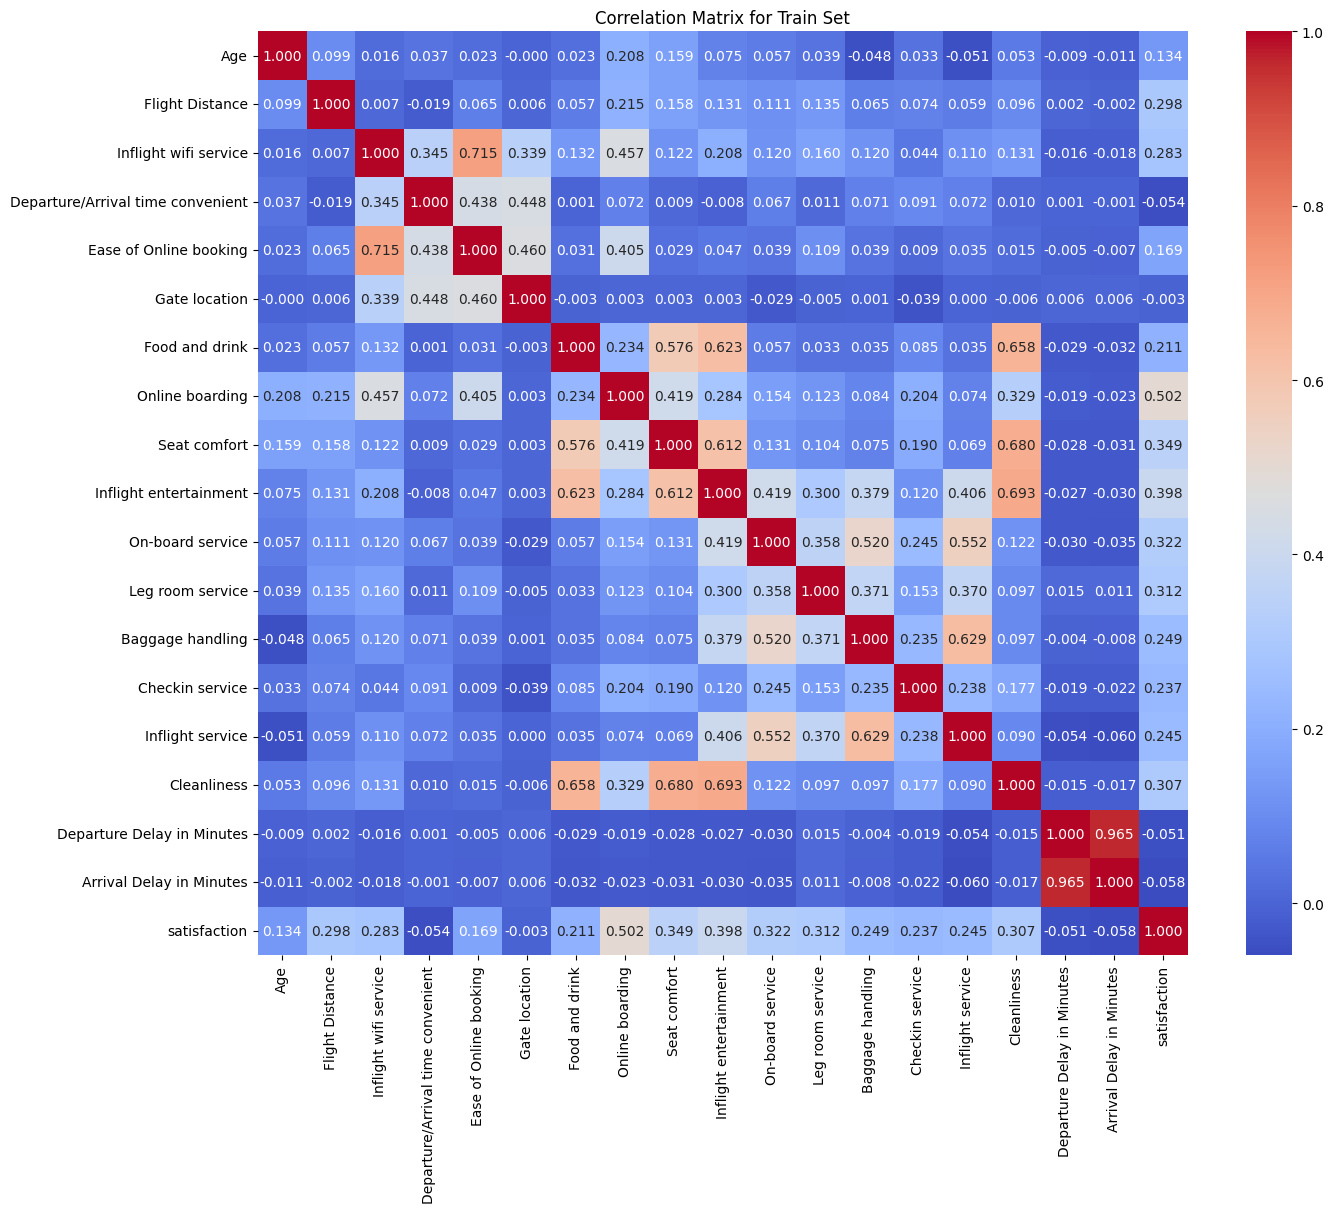

In [57]:
corr_mat = data.corr(numeric_only=True)
 #Correlation
plt.figure(figsize=(15,12))
sns.heatmap(data=corr_mat, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Correlation Matrix for Train Set")
plt.show()

In [58]:
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class'] + data.columns[6:20].tolist()
data[categorical_cols] = data[categorical_cols].astype('category')


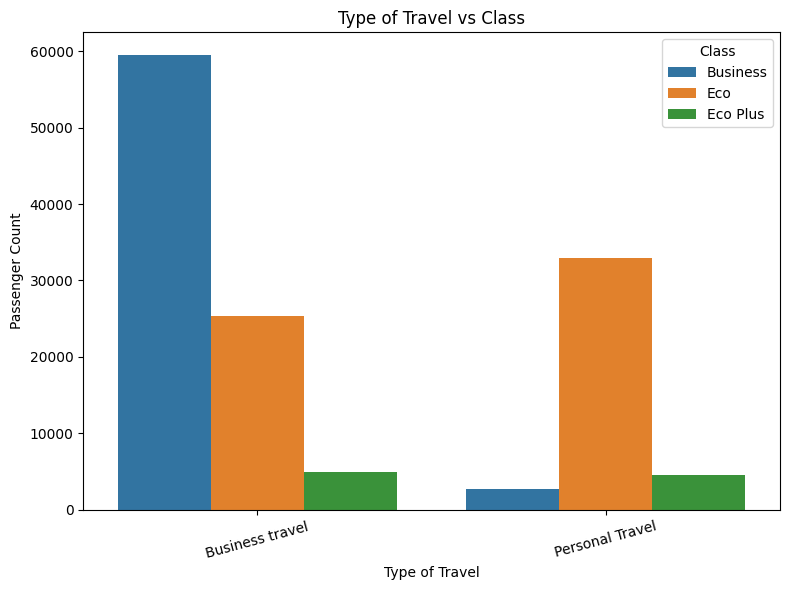

In [59]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Type of Travel', hue='Class')
plt.title('Type of Travel vs Class')
plt.xlabel('Type of Travel')
plt.ylabel('Passenger Count')
plt.xticks(rotation=15)
plt.legend(title='Class')
plt.tight_layout()
plt.show()


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  category
 1   Customer Type                      129880 non-null  category
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  category
 4   Class                              129880 non-null  category
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  category
 7   Departure/Arrival time convenient  129880 non-null  category
 8   Ease of Online booking             129880 non-null  category
 9   Gate location                      129880 non-null  category
 10  Food and drink                     129880 non-null  category
 11  Online boarding           

Data Visualization

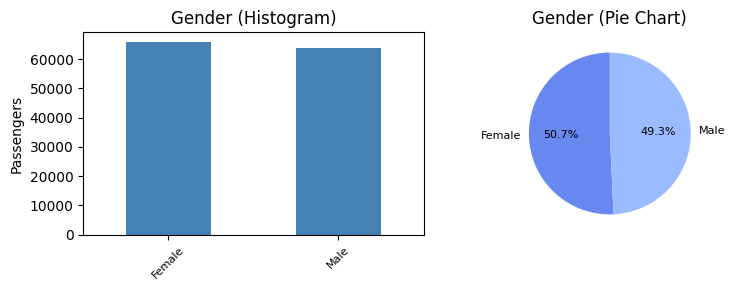

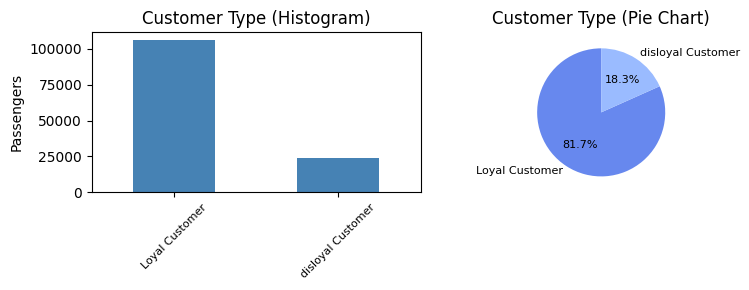

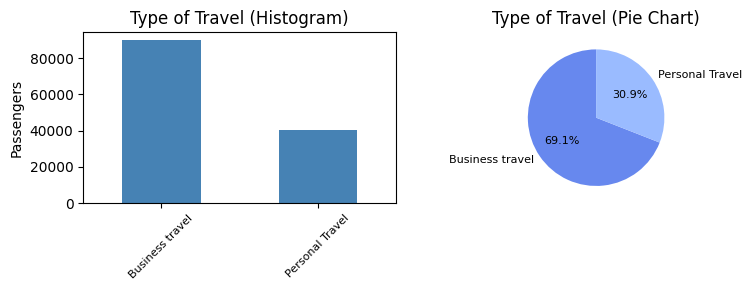

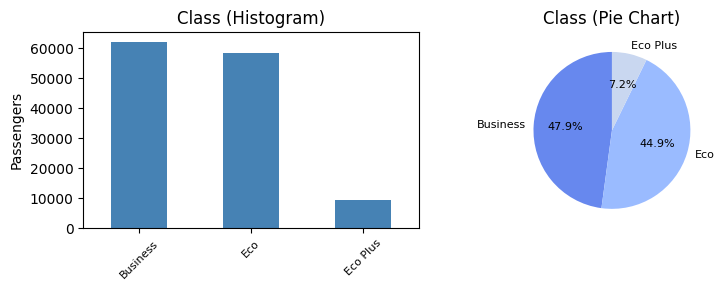

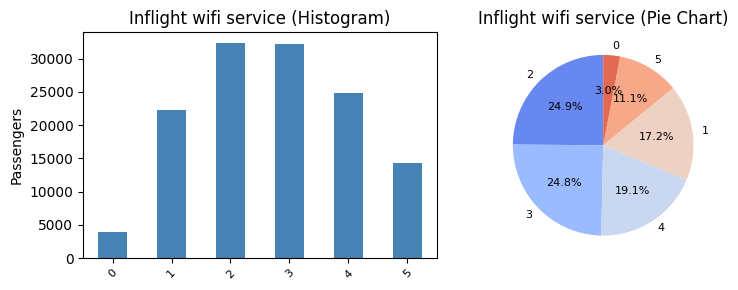

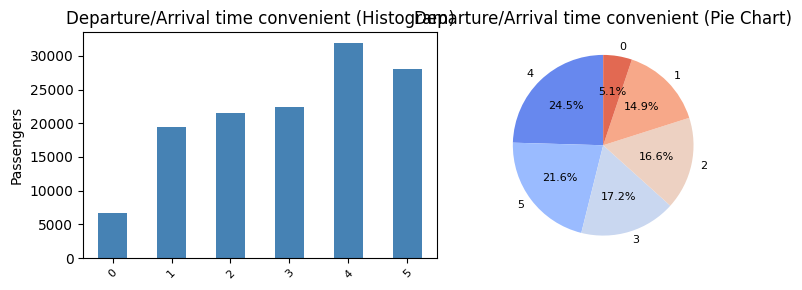

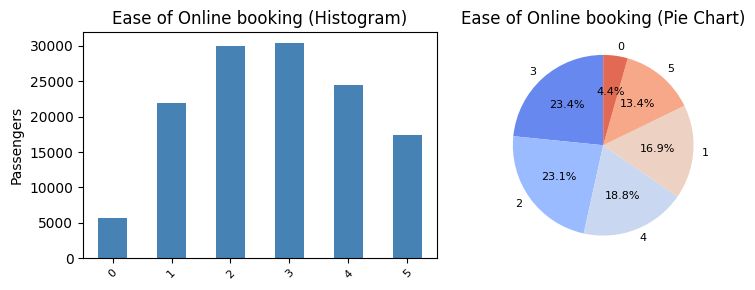

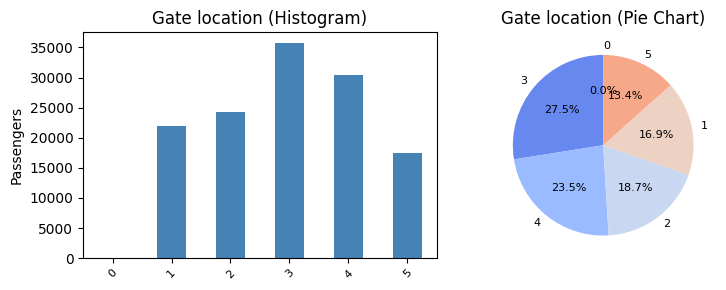

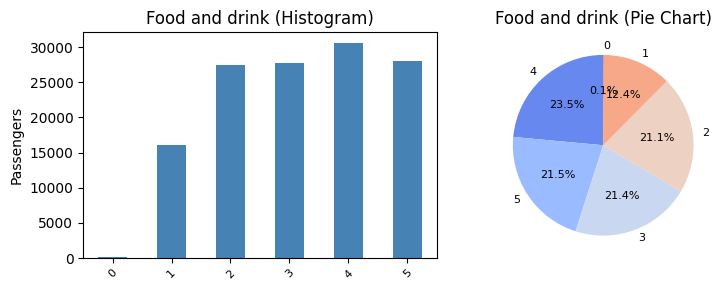

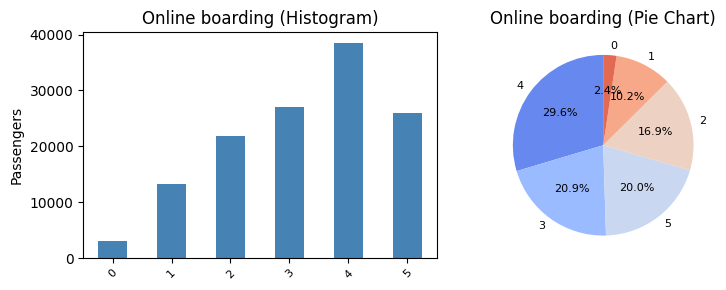

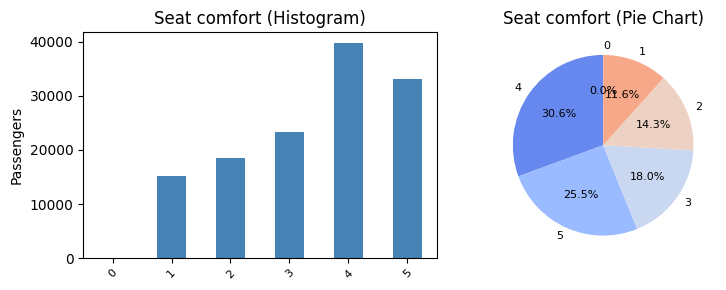

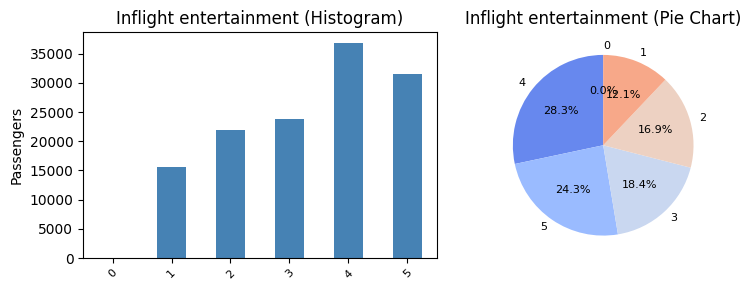

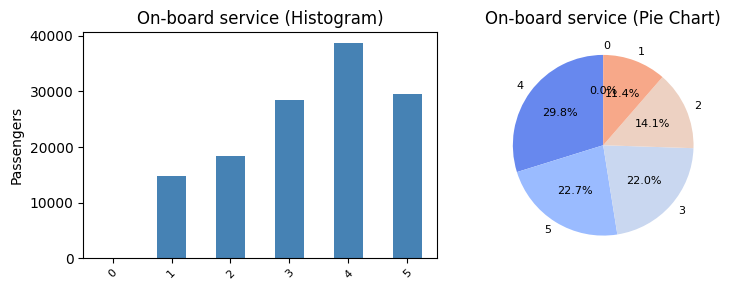

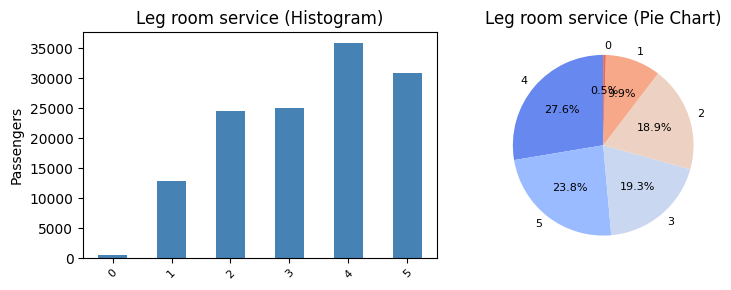

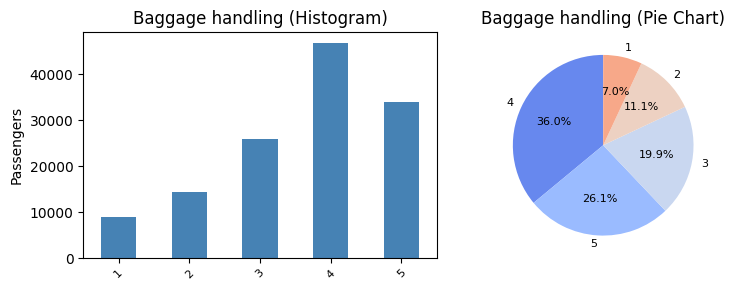

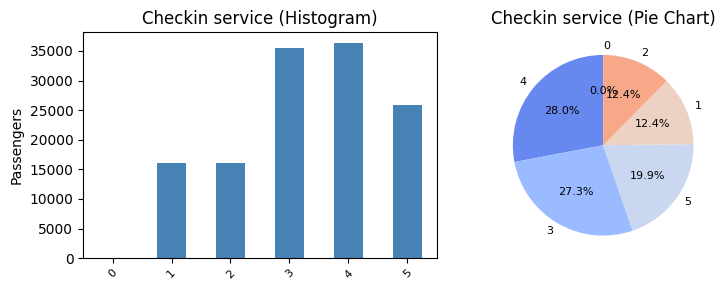

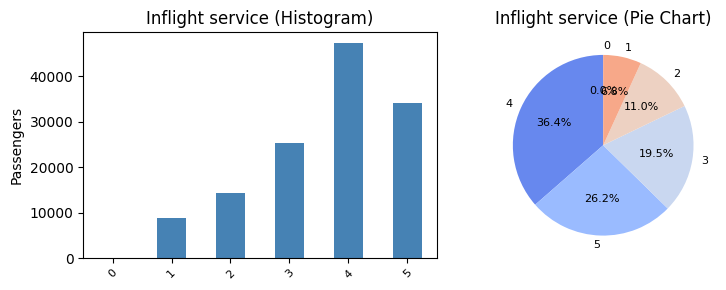

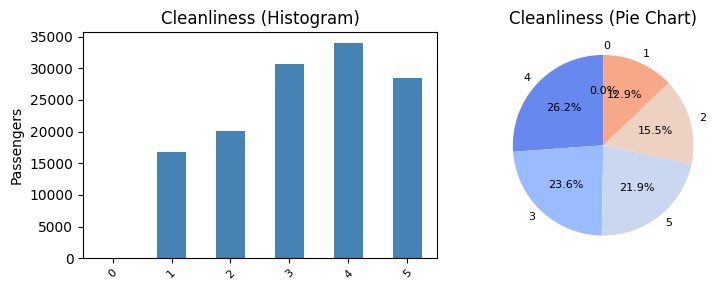

In [61]:
palette = sns.color_palette('coolwarm')
for col in categorical_cols:
    counts = data[col].value_counts()
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))

    counts.sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title(f'{col} (Histogram)')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Passengers')
    axes[0].tick_params(axis='x', rotation=45, labelsize=8)

    counts.plot(kind='pie', ax=axes[1], colors=palette, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
    axes[1].set_title(f'{col} (Pie Chart)')
    axes[1].set_ylabel('')
    axes[1].set_aspect('equal')

    plt.tight_layout()
    plt.show()


In [62]:

# sns.boxplot(data=train_df, x='Class', y='Age', ax=axes[1], palette='magma', hue='Class', legend=False)
# axes[1].set_title('Age Distribution by Travel Class')


/var/folders/2s/q86v619s3_g1crpyjj20lc9m0000gn/T/ipykernel_92291/1181988469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Customer Type', y='Age', ax=axes[0], palette='magma', legend=False)


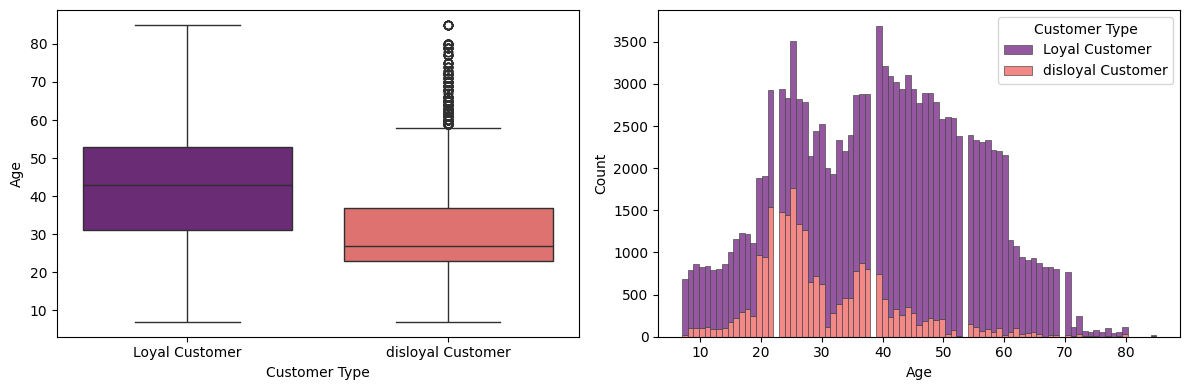

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data=data, x='Customer Type', y='Age', ax=axes[0], palette='magma', legend=False)

sns.histplot(data=data, x = 'Age', hue = 'Customer Type', multiple = 'stack', palette = 'magma', 
             edgecolor = ".3", linewidth = .5, ax = axes[1])
plt.tight_layout()
plt.show()

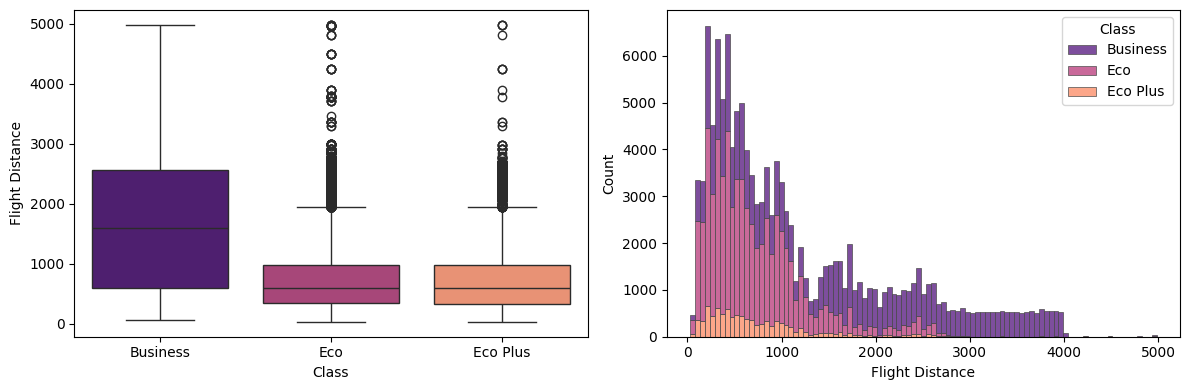

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(data=data, x = 'Class', y = 'Flight Distance', palette = 'magma', ax = axes[0], hue='Class', legend=False)

sns.histplot(data=data, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "magma", 
             edgecolor = ".3", linewidth = .5, ax = axes[1])

plt.tight_layout()
plt.show()

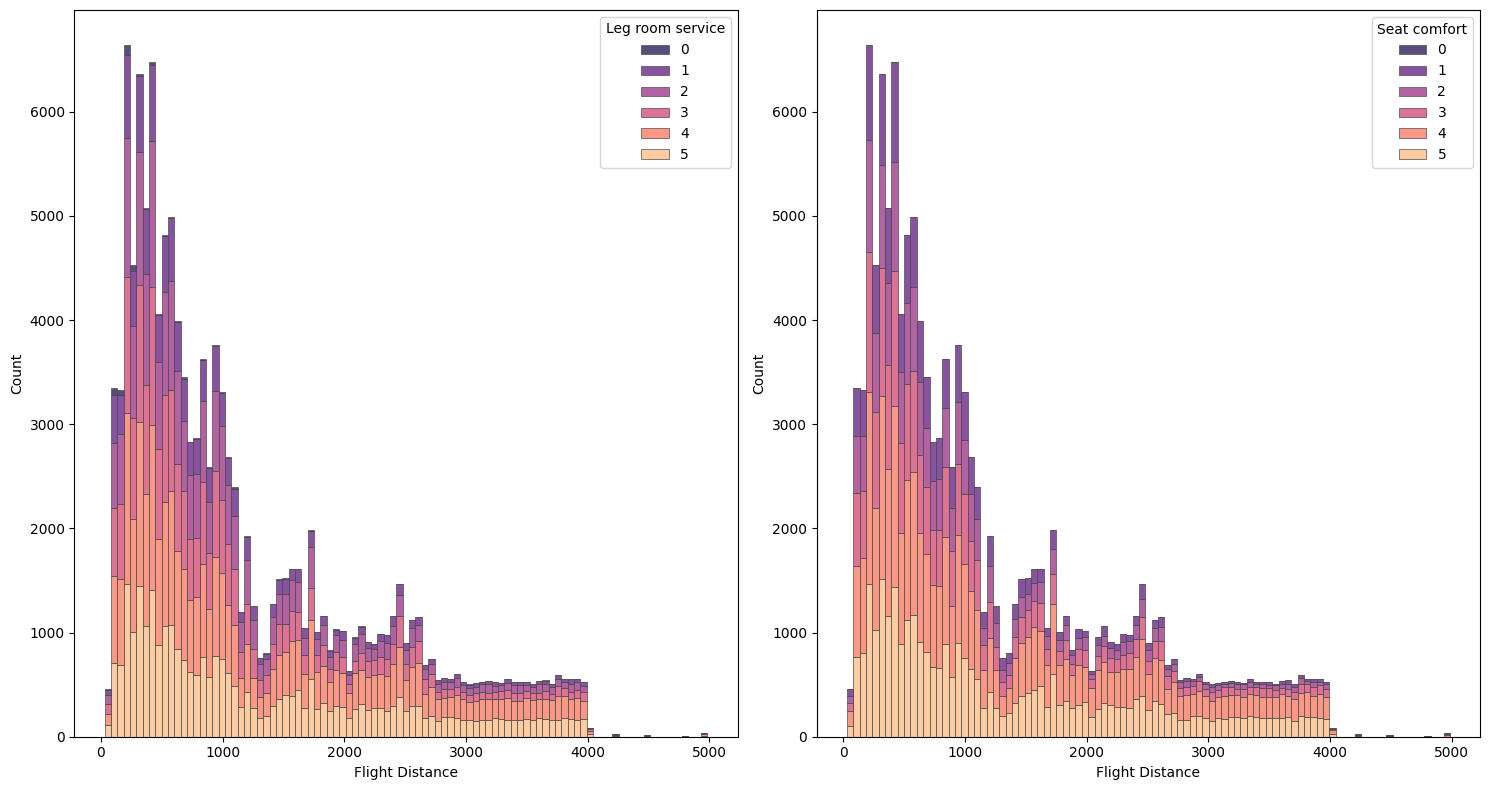

In [79]:
fig, axes = plt.subplots(1, 2, figsize = (15,8))
sns.histplot(data=data, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "magma", edgecolor = ".3", linewidth = .5, ax = axes[0])
sns.histplot(data=data, x = "Flight Distance", hue = "Seat comfort", multiple = "stack", palette = "magma", edgecolor = ".3", linewidth = .5, ax = axes[1])
plt.tight_layout()
plt.show()

/var/folders/2s/q86v619s3_g1crpyjj20lc9m0000gn/T/ipykernel_92291/1768390364.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "magma", data = data, ax = ax[0, 0])
/var/folders/2s/q86v619s3_g1crpyjj20lc9m0000gn/T/ipykernel_92291/1768390364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "magma", data = data, ax = ax[1, 0])


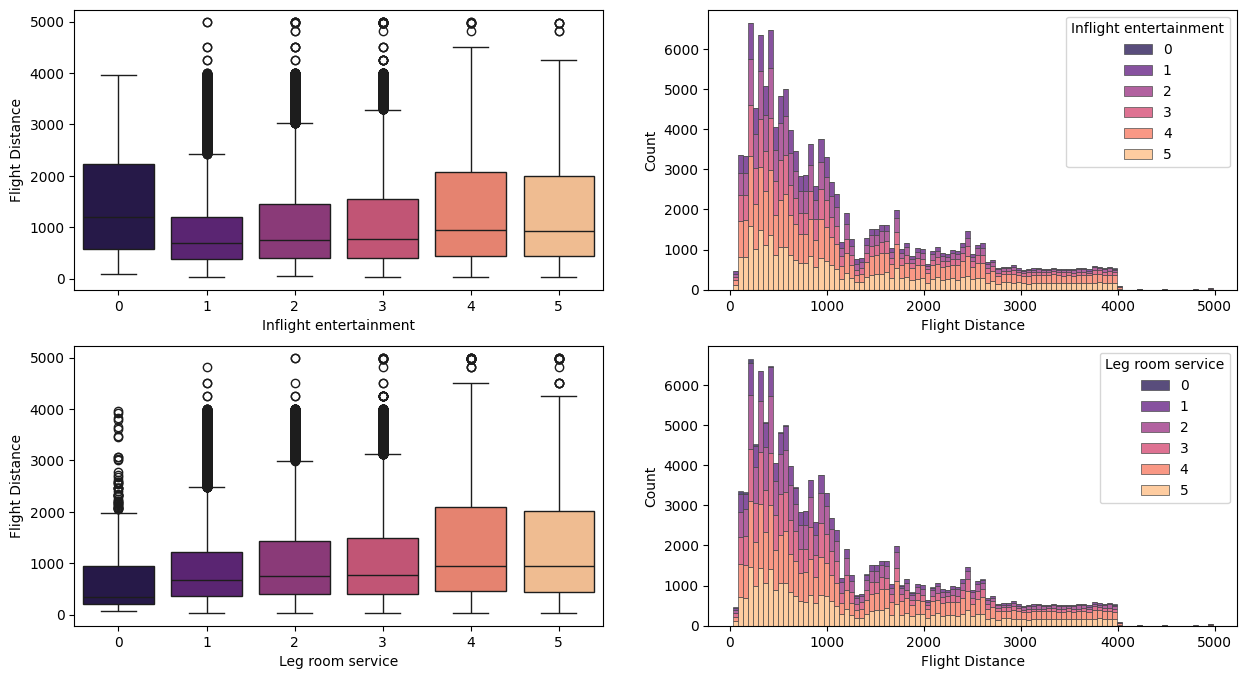

In [80]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "magma", data = data, ax = ax[0, 0])
sns.histplot(data, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "magma", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "magma", data = data, ax = ax[1, 0])
sns.histplot(data, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "magma", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])
pass

The following pattern can be seen: the more distance an aircraft passenger travels (respectively, the longer they are in flight), the more they are satisfied with the entertainment in flight and the extra legroom (on average).

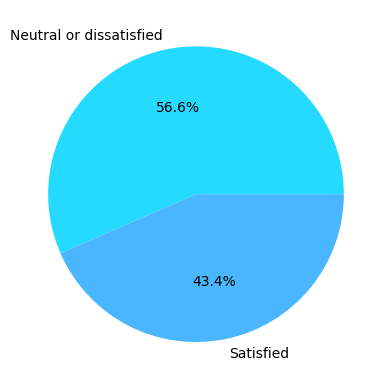

In [66]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("cool"), autopct = '%1.1f%%')
pass

Now consider the dependence graphs of some categorical features on the target - satisfaction of air passengers:



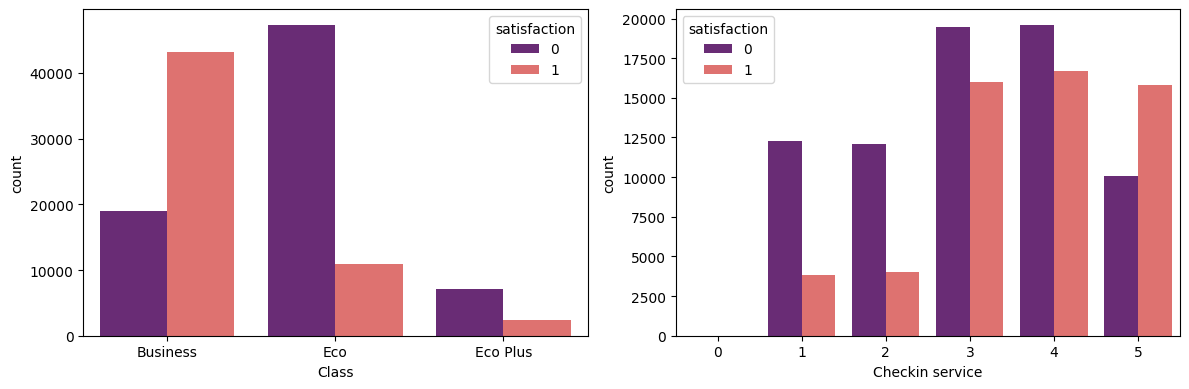

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data = data, x = 'Class', hue = 'satisfaction', palette = "magma", ax=axes[0])

sns.countplot(data = data, x = 'Checkin service', hue = 'satisfaction', palette = "magma", ax=axes[1])

plt.tight_layout()
plt.show()


In [68]:
data.info()
pass

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  category
 1   Customer Type                      129880 non-null  category
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  category
 4   Class                              129880 non-null  category
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  category
 7   Departure/Arrival time convenient  129880 non-null  category
 8   Ease of Online booking             129880 non-null  category
 9   Gate location                      129880 non-null  category
 10  Food and drink                     129880 non-null  category
 11  Online boarding           

In [69]:
#np.triu used to get upper triangle of correlation matrix
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.965291
Inflight wifi service       Ease of Online booking      0.714807
Inflight entertainment      Cleanliness                 0.692511
Seat comfort                Cleanliness                 0.679613
Food and drink              Cleanliness                 0.658054
Baggage handling            Inflight service            0.629237
Food and drink              Inflight entertainment      0.623461
Seat comfort                Inflight entertainment      0.611837
Food and drink              Seat comfort                0.575846
On-board service            Inflight service            0.551569
                            Baggage handling            0.520296
Online boarding             satisfaction                0.501749
dtype: float64

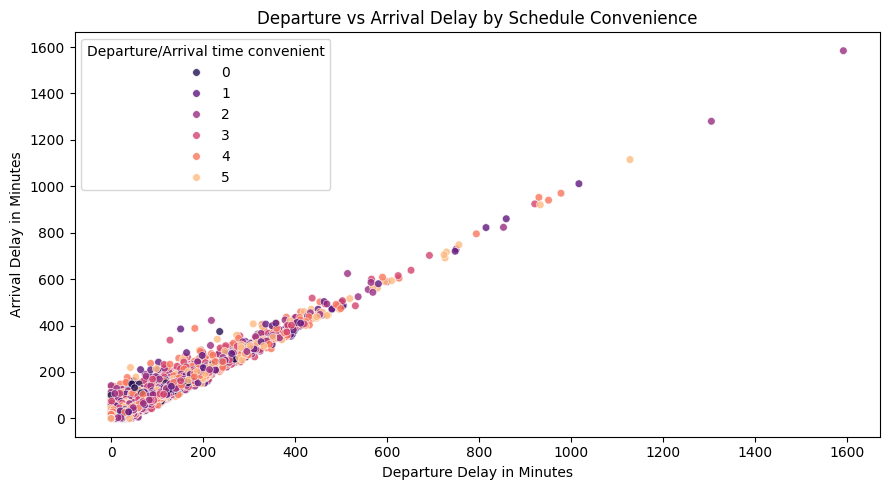

In [70]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=data, x='Departure Delay in Minutes', y='Arrival Delay in Minutes',
                hue='Departure/Arrival time convenient', palette='magma', alpha=0.8, s=30)
plt.title('Departure vs Arrival Delay by Schedule Convenience')
plt.tight_layout()
plt.show()

we can observe that the dependence of the arrival time delay on the departure time delay is more or less linear
if the departure is delayed by a certain amount of time, the landing will most likely be delayed as well by about same amount of time, taking in consideration that the aircraft does not accelerate in flight to catch up the lost time

In [71]:
data.isna().sum().loc[lambda s: s > 0]

Arrival Delay in Minutes    393
dtype: int64

In [72]:
null_mask = data.isnull().any(axis=1)
null_rows = data[['Customer Type', 'Age', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']][null_mask]

print(null_rows)

            Customer Type  Age  Departure Delay in Minutes  \
213        Loyal Customer   38                          31   
1124       Loyal Customer   53                          38   
1529       Loyal Customer   39                          11   
2004    disloyal Customer   26                          41   
2108       Loyal Customer   24                           1   
...                   ...  ...                         ...   
127976     Loyal Customer   45                          26   
128037     Loyal Customer   29                          19   
128205  disloyal Customer   38                           0   
129032     Loyal Customer   52                           0   
129372  disloyal Customer   26                           4   

        Arrival Delay in Minutes  
213                          NaN  
1124                         NaN  
1529                         NaN  
2004                         NaN  
2108                         NaN  
...                          ...  
127976    

In [73]:
# fill missing arrival delays with the matching departure delay
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(
    data['Departure Delay in Minutes']
)

# train_df['Arrival Delay in Minutes'] = train_df['Arrival Delay in Minutes'].fillna(
#     train_df['Arrival Delay in Minutes'].median(axis=0)
# )

In [74]:
def correlation_for_dropping(df, threshold):
    columns_to_drop = set()
    corr = df.corr(numeric_only=True)
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                print(f"{corr.columns[i]} - {corr.columns[j]}: {corr.iloc[i, j]}")
                columns_to_drop.add(corr.columns[i])
    return columns_to_drop

correlation_for_dropping(train_df, 0.5)

Ease of Online booking - Inflight wifi service: 0.715856141267444
Seat comfort - Food and drink: 0.5745564522785715
Inflight entertainment - Food and drink: 0.6225120323639994
Inflight entertainment - Seat comfort: 0.6105901255624786
Baggage handling - On-board service: 0.519134194112049
Inflight service - On-board service: 0.5507821723190345
Inflight service - Baggage handling: 0.6285610871326183
Cleanliness - Food and drink: 0.657759734307051
Cleanliness - Seat comfort: 0.678533913541873
Cleanliness - Inflight entertainment: 0.6918146374078887
Arrival Delay in Minutes - Departure Delay in Minutes: 0.9654809013755764


{'Arrival Delay in Minutes',
 'Baggage handling',
 'Cleanliness',
 'Ease of Online booking',
 'Inflight entertainment',
 'Inflight service',
 'Seat comfort'}